# Data Mining / Prospecção de Dados

## Sara C. Madeira, 2019/20

# Project 3 - Classification/Regression

## Logistics

**In a "normal" scenario students should work in teams of 2 people. Due to the social distance imposed by current public health situation, students were allowed to work in groups of 1 and 3. In this context, the amount of work was adapted according to the number of students in groups as described below.**

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 2, 3 and 4**  for groups of 1, 2 and 3 students, respectively.
    * In Task **4**, groups of 1, 2 and 3 students should try 1, 2 and 3 ensemble approaches, respectively.

The quality of the project will then dictate its grade.

**The project's solution should be uploaded in Moodle before the end of June, 9th 2020 (23:59).** 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. Note that you can use `PD_201920_Project3.ipynb`as template.**

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions should be justified and results should be critically discussed.**

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`ModifiedHousePrices.csv`**, a modified version of the train dataset used in Kaggle's competition ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

If you ask a home buyer to describe their dream house, they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With more than 70 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the price, and a
2. **Classification Task**: predict a price category.

The variables are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

The targets are:
1. `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict in the regression task (same as in the Kaggle challenge).
2. `Price3Classes` - the price category, where price can be below 200000 ("<200000"), between 200000 and 400000 ("[200000,400000]"), or above 200000 (">200000"). This is the target variable that you're trying to predict in the classification task. 

# 0. Imports

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import smogn
from imblearn.combine import SMOTETomek

## 1. Load and Preprocess Dataset

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

In [2]:
df_data = pd.read_csv('data/ModifiedHousePrices.csv')
df_data.shape

(1460, 82)

In [3]:
df_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price3Classes
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,"[200000,400000]"
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,<200000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,"[200000,400000]"
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,<200000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,"[200000,400000]"


## 1.1. Exploratory Data Analysis

### 1.1.1 Continuous Variable - SalePrice

Text(0.5, 0, 'Price')

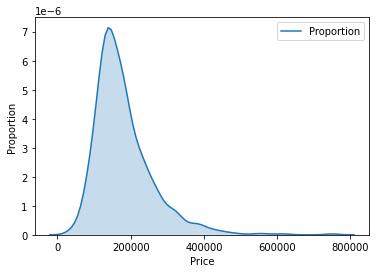

In [52]:
sns.kdeplot(df_data['SalePrice'], shade=True)
plt.legend(['Proportion'])
plt.ylabel('Proportion')
plt.xlabel('Price')

### 1.1.2. Categorical Variable - Price3Classes

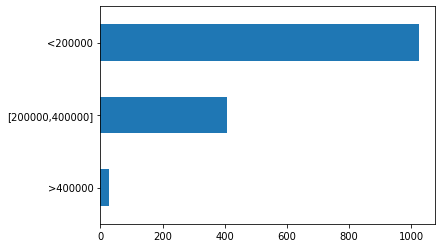

In [57]:
df_data.Price3Classes.value_counts().sort_values().plot(kind = 'barh')

### 1.1.3. Feature Exploration

In [13]:
cat_var = [
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'MoSold',
    'SaleType',
    'SaleCondition'
]

num_var = [
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',    
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'YrSold',
]

In [37]:
all_columns = cat_var + num_var
template_df = list()

df_var_columns = [
    'column',
    'data_type',
    'max',
    'min',
    'mean',
    'nulls_count',
    'nulls_percentage',
    'std',
    'type',
    'unique_count',
    'zero_count',
]

for s in all_columns:
    template_df.append([s]+['']*(len(df_var_columns)-1))

df_variables_info = pd.DataFrame(template_df, columns=df_var_columns).set_index('column')

In [35]:
empty_df = []
total_rows = len(df_data)

for s in df_data.loc[:,'MSSubClass':'SaleCondition'].columns:

    nullable_values = len(df_data[s][df_data[s].isnull()])
    df_variables_info.loc[s, 'nulls_count'] = nullable_values


    df_variables_info.loc[s, 'nulls_percentage'] = (nullable_values/total_rows) * 100
    
    
    df_variables_info.loc[s, 'data_type'] = df_data[s].dtype
    
    
    df_variables_info.loc[s, 'unique_count'] = len(df_data[s].unique())
    
    
    #add column zero_count for features with dtype int64 or float64
    if (df_data[s].dtype == np.int64) | (df_data[s].dtype == np.float64) : 
        df_variables_info.loc[s, 'zero_count'] = len(df_data[df_data[s] == 0])

    if s in cat_var: df_variables_info.loc[s, 'type'] = 'categorical'
        
    elif s in num_var: 
        df_variables_info.loc[s, 'type'] = 'numerical'

        df_describe = df_data[s].describe().to_frame()
        df_variables_info.loc[s, 'mean'] = df_describe.loc['mean',s]
        df_variables_info.loc[s, 'std'] = df_describe.loc['std',s]
        df_variables_info.loc[s, 'min'] = df_describe.loc['min',s]
        df_variables_info.loc[s, 'max'] = df_describe.loc['max',s]

df_variables_info = df_variables_info.reset_index()

In [36]:
pd.set_option('display.max_rows', None)
df_variables_info

,column,data_type,max,min,mean,nulls_count,nulls_percentage,std,type,unique_count,zero_count
0,MSSubClass,int64,,,,0,0,,categorical,15,0
1,MSZoning,object,,,,0,0,,categorical,5,
2,Street,object,,,,0,0,,categorical,2,
3,Alley,object,,,,1369,93.7671,,categorical,3,
4,LotShape,object,,,,0,0,,categorical,4,
5,LandContour,object,,,,0,0,,categorical,4,
6,Utilities,object,,,,0,0,,categorical,2,
7,LotConfig,object,,,,0,0,,categorical,5,
8,LandSlope,object,,,,0,0,,categorical,3,
9,Neighborhood,object,,,,0,0,,categorical,25,


## 1.2. Missing Values inputation

Numerical valued columns with missing values are:
+ Linear feet of street connected to property (LotFrontage)
+ Masonry veneer area in square feet (MasVnrArea)
+ Year the garage was built (GarageYrBlt)

We will inpute -1 values to the columns which can mean that the values for these cases are unknown and therefore we use a value which is not in the domain of the feature.

In [39]:
df_data[num_var] = df_data[num_var].fillna(-1)

Categorical columns with missing values are a lot more, they include:
+ Type of alley access (Alley)
+ Masonry veneer type (MasVnrType)
+ Height of the basement (BsmtQual)
+ General condition of the Basement (BsmtCond)
+ Walkout of garden level basement walls (BsmtExposure)
+ Quality of basement finished area (BsmtFinType1)
+ Quality of second finished area (BsmtFinType2)
+ Electrical System (Electrical)
+ Fireplace quality (FireplaceQu)
+ Garage location (GarageType)
+ Interior finish of the garage (GarageFinish)
+ Garage quality (GarageQual)
+ Garage condition (GarageCond)
+ Pool quality (PoolQC)
+ Fence quality (Fence)
+ Miscellaneous feature not covered in other categories (MiscFeature)

We will input unknown since it is impossible to know if the missing data was forgotten to be added or if it was just because it was not applicable.

In [40]:
df_data[cat_var] = df_data[cat_var].fillna('unknown')

## 1.3. Feature Selection

As the number of features increases, the model becomes more complex. The more the number of features, the more the chances of overfitting. A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on and in turn becomes overfitted, resulting in poor performance on real data, beating its purpose.

We therefore do a dimensionality reduction. But before we do it, we must encode the categorical columns.

### 1.3.1 Features encoding
Here we define two methods that we will use during the notebook, to encode categorical features:

* int_encode_feature, that is used in handling categorical features with two values;
* ohenc_encode_feature,that uses One Hot Encoding, and it is used to handle categorical features with more than two values.

In [84]:
def get_data(df, features=None, regression=True):
    """Creates data.
    
    Parameters:
        df (DataFrame): table with rows and columns
        features (Index, Series, list): vector of column names to include in data
        binary (bool): choose which target values to use
    
    Returns:
        ndarray: matrix of features values
        ndarray: vector of target values
        ndarray, Index, list: vector of feature names
        string: target name
    
    """
    if features is None: 
        features = df.columns.tolist()
    
    # guarantee that target features are not included
        features.remove('Id')
        features.remove('Price3Classes')
        features.remove('SalePrice')
    
    X = df[features]
    
    if regression == True:
        y = df[['SalePrice']]
        target = 'SalePrice'
    else:
        y = df[['Price3Classes']]
        target = 'Price3Classes'
    
    return X, y, features, target

In [85]:
def int_encode_feature(vect):
    enc = LabelEncoder()
    label_encoder = enc.fit(vect)
    integer_classes = label_encoder.transform(label_encoder.classes_)
    t = label_encoder.transform(vect)
    return t

#ONE HOT ENCODER METHOD FROM TP05 CLASS

#For categorical features with more than two possible values, a different approach is used. 
#The idea is to encode each possible value as a distinct feature, using the so-called one-hot-encoding.

#We start by defining the function ohenc_encode_feature that given a target column (col), 
#the number of rows (nrow) and the number of possible values (ndim), replaces the original column by ndim new binary colums.


def ohenc_encode_feature(table_X, col, nrow, ndim, columns, column_to_encode):
    enc = LabelEncoder()
    label_encoder = enc.fit(table_X[:, col])
    integer_classes = label_encoder.transform(label_encoder.classes_).reshape(ndim, 1)
    enc = OneHotEncoder()
    one_hot_encoder = enc.fit(integer_classes)
    # First, convert feature values to 0-(N-1) integers using label_encoder
    num_of_rows = nrow
    t = label_encoder.transform(table_X[:, col]).reshape(num_of_rows, 1)
    # Second, create a sparse matrix with col columns, each one indicating
    # whether the instance belongs to the class
    new_features = one_hot_encoder.transform(t)
    new_features_names = enc.get_feature_names([column_to_encode])
    columns.remove(column_to_encode)
    columns.extend(new_features_names)
    # Add the new features to table_X
    table_X = np.concatenate([table_X, new_features.toarray()], axis = 1)
    # Eliminate converted columns
    table_X = np.delete(table_X, [col], 1)
    return new_features_names,  pd.DataFrame(table_X, columns= columns)

def binary_encode_columns(df, cols):
    for c in cols:
        column_index = df.columns.get_loc(c)
        df[c] = int_encode_feature(df[c].values)
        df[c] = df[c].astype(float)
    return df

def one_hot_encoding_columns(df, cols_to_encode):
    columns = list(df)
    num_of_rows = len(df)
    for c in cols_to_encode:
        column_index = df.columns.get_loc(c)
        num_uniques = len(list(df[c].unique()))
        new_columns_names, df = ohenc_encode_feature(df.values, column_index, num_of_rows, num_uniques, columns, c)
        df[new_columns_names] = df[new_columns_names].astype(float)
    return df

In [87]:
df_X, df_y_reg, features, target = get_data(df_data, regression=True)
df_X, df_y_cat, features, target = get_data(df_data, regression=False)
df_X = one_hot_encoding_columns(df_X, cat_var)
df_X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,65,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
1,80,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
2,68,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,60,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,84,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0


### 1.3.2. Feature Selection

#### For Regression

In [126]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(df_X, df_y_reg)

/home/gustavosf/Documents/GitHub/DataMining-Project-3/dm-ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=500, random_state=1)

Text(0, 0.5, 'Importance')

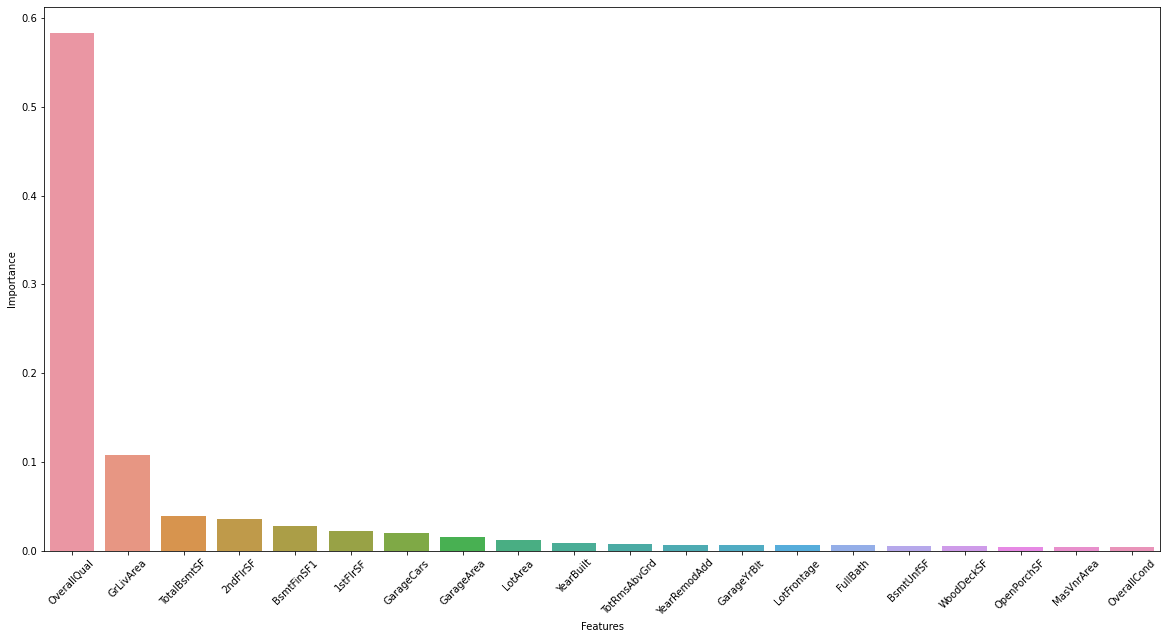

In [127]:
importance_df = pd.DataFrame(np.vstack((df_X.columns,model.feature_importances_))).T.sort_values(1, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=importance_df.iloc[:20,:], x=0, y=1)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')

In [135]:
# Saving the column for Regression analysis

reg_columns = importance_df[0].head(20).values.tolist()

#### For Classification

In [136]:
model = RandomForestClassifier(n_estimators=500, random_state=1)
model.fit(df_X, df_y_cat)

/home/gustavosf/Documents/GitHub/DataMining-Project-3/dm-ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=500, random_state=1)

Text(0, 0.5, 'Importance')

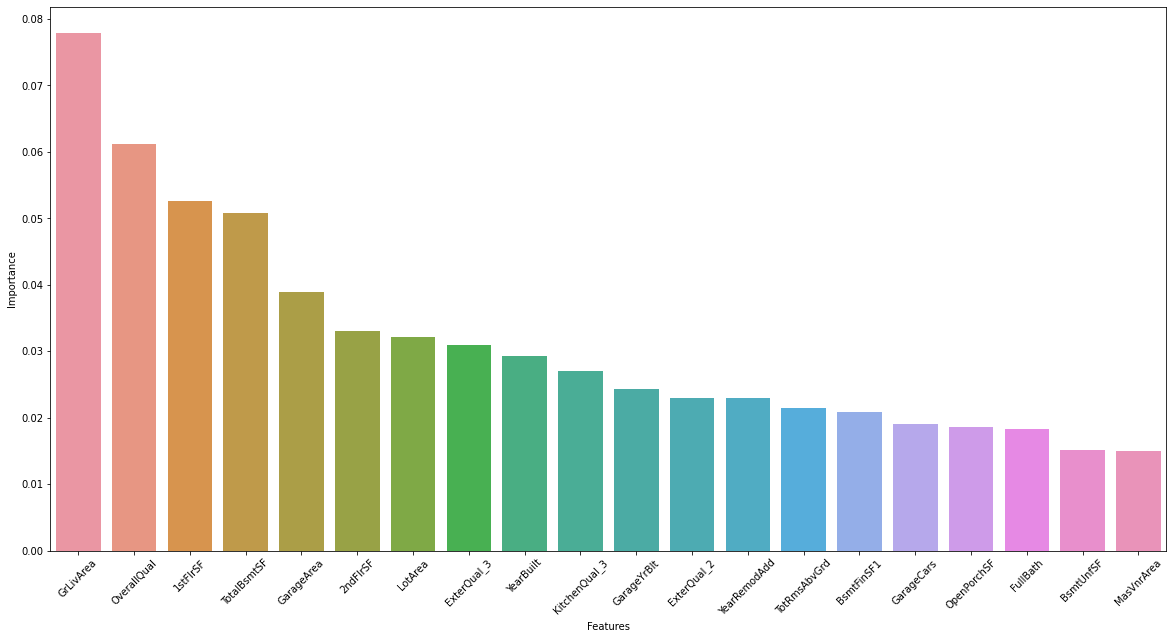

In [137]:
importance_df = pd.DataFrame(np.vstack((df_X.columns,model.feature_importances_))).T.sort_values(1, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=importance_df.iloc[:20,:], x=0, y=1)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')

In [138]:
# Saving the column for Regression analysis

class_columns = importance_df[0].head(20).values.tolist()

## Balancing Data

### For Classification

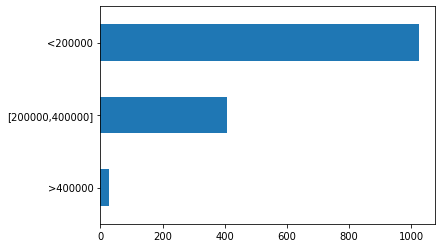

In [152]:
df_y_cat.Price3Classes.value_counts().sort_values().plot(kind = 'barh')

In [145]:
smt = SMOTETomek(random_state=1)
X_res, y_res = smt.fit_resample(df_X[class_columns], df_y_cat['Price3Classes'])

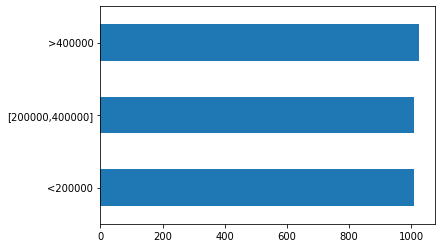

In [151]:
y_res.value_counts().sort_values().plot(kind = 'barh')

### For Regression

Text(0.5, 0, 'Price')

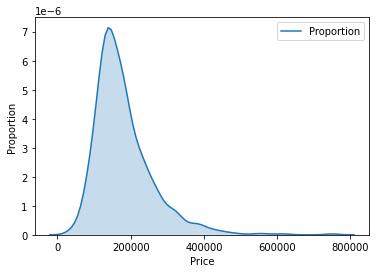

In [153]:
sns.kdeplot(df_data['SalePrice'], shade=True)
plt.legend(['Proportion'])
plt.ylabel('Proportion')
plt.xlabel('Price')

In [180]:
df2 = pd.read_csv('data/ModifiedHousePrices.csv')
df_X_reg = df2[reg_columns].fillna(-1)

In [181]:
df_X_reg['SalePrice'] = df_y_reg['SalePrice']
df_data_reg = smogn.smoter(data=df_X_reg, y='SalePrice')

r_index: 100%|##########| 84/84 [00:00<00:00, 630.13it/s]


Text(0.5, 0, 'Price')

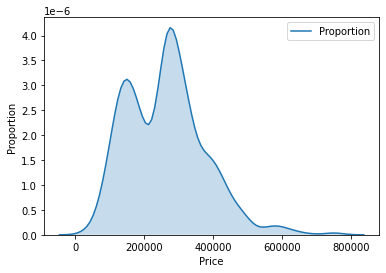

In [182]:
sns.kdeplot(df_data_reg['SalePrice'], shade=True)
plt.legend(['Proportion'])
plt.ylabel('Proportion')
plt.xlabel('Price')

In [183]:
# Save data

df_X_reg = df_data_reg[reg_columns]
df_y_reg = df_data_reg['SalePrice']

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

In [ ]:
# Present and Discuss your results here
# ...

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

In [ ]:
# Present and Discuss your results here
# ...

## 4. Ensemble Learning

### Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)/regressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

In [ ]:
# Present and Discuss your results here
# ...

### XGBoost 

* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

In [ ]:
# Present and Discuss your results here
# ...

### Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [ ]:
# Present and Discuss your results here
# ...